In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

In [8]:
subs = pd.read_csv("submissions-30day.csv", names=['lb', 'ub', 'count'])
pays = pd.read_csv("payloads-30days.csv", names=['lb', 'ub', 'count'])

In [9]:
pays['count'] / subs['count']

0     0.551637
1     0.572161
2     0.497734
3     0.485609
4     0.532971
5     0.527047
6     0.509390
7     0.524784
8     0.488226
9     0.518968
10    0.492243
11    0.488904
12    0.460437
13    0.453014
14    0.417476
15    0.387261
16    0.553830
17    0.597744
18    0.595445
19    0.551282
20    0.581055
21    0.578000
22    0.562019
23    0.552063
24    0.572991
25    0.579125
26    0.538062
27    0.548046
28    0.518839
29    0.487490
Name: count, dtype: float64

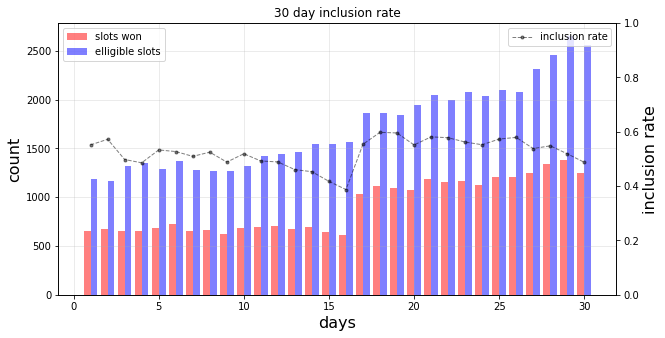

In [31]:
f, ax = plt.subplots(figsize=(10,5))

x=np.arange(1, 31)
ax.bar(x-0.2, pays['count'].values, width=0.4, color='r', alpha=0.5, label='slots won')
ax.bar(x+0.2, subs['count'].values, width=0.4, color='b', alpha=0.5, label='elligible slots')

ax.set_xlabel('days', size=16)
ax.set_ylabel('count', size=16)
ax.grid(alpha=0.3)

ax2 = ax.twinx()
ax2.plot(x, pays['count'].values / subs['count'].values, 'k.--', linewidth=1, alpha=0.5, label='inclusion rate')
ax2.set_ylim(0, 1)
ax2.set_ylabel('inclusion rate', size=16)
ax.set_title('30 day inclusion rate')
ax.legend()
ax2.legend()
plt.show()

In [57]:
s1000 = pd.read_csv('alchemy-data/sample1000.csv', delimiter=' ', names=['block', 'hash', 'submissions', 'winning'])
s1000.head()

,block,hash,submissions,winning
0,16484026,0x8131b1ca0f3bc71f05bacb947070916206e1c48e6c8c...,864,1
1,16484030,0xcd14c3359ee6b134b181d1f4a716b6bbe1d01a4542e6...,638,1
2,16484032,0x65ce84a69ee074fbbafb24ec2be099bf8c169f94a53e...,803,1
3,16484040,0x7ee315659184fbc6c36b3f526fae94dc366a911bcaf3...,563,0
4,16484041,0x4697009bbb744aa5d11431c27f8049328b80732a4112...,717,1


In [63]:
s1000['winning'].value_counts()

1    119
0     27
2      3
3      1
Name: winning, dtype: int64

In [65]:
27/150, 123/150

(0.18, 0.82)

In [32]:
bounds = [16484026,16491182,16498342,16505506,16512669,16519833,16526998,16534158,16541307,16548446,16555610,16562775,16569938,16577092,16584251,16591387,16598551,16605709,16612873,16620030,16627179,16634332,16641482,16648623,16655708,16662828,16669948,16677068,16684174,16691287,16698382]

In [ ]:
curl https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZBz -X POST -H
    "Content-Type: application/json" -s -d '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0}]' 
    | jq -jr '.[] | .result["number"], " ", .result["hash"], "\n"'

In [36]:
import requests

In [37]:
url = 'https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZB'
payload = '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0}]'
headers = {'content-type': 'application/json'}
r = requests.post(url, data=payload, headers=headers)

In [40]:
16698026-16484026

214000

16484026

In [51]:
template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
template

'"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0'

In [55]:
payload = '['
for i in range(16484026,16484026+1000):
    template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
    payload += "{"
    payload += template
    payload += "},"
payload=payload[:-1]
payload += "]"
payload

'[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bc",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bd",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86be",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bf",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c0",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c1",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c2",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c3",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c4",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xf

In [39]:
print(r)

<Response [401]>


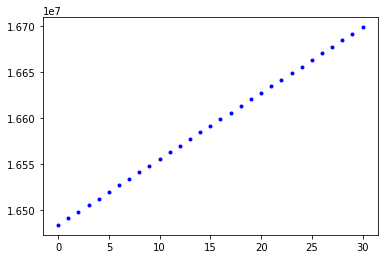

In [35]:
plt.plot(bounds, 'b.')